In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


A good dataset is the MNIST hand written numbers dataset. It is built in to sklearn and keras. Its a dataset of 60,000 images, greyscale, 28 x 28 pixels.

In [ ]:
from keras.datasets import mnist

In [ ]:
mnist = keras.datasets.mnist #import data
(x_train, y_train),(x_test, y_test) = mnist.load_data() #load the data
# interestingly this load_data function returns 2 tuples of training and testing data

Examine the data

In [ ]:
print(f"x_train.shape({x_train.shape}), y_train.shape({y_train.shape})")

x_train.shape((60000, 28, 28)), y_train.shape((60000,))


So luckily for us the data is in 60,000 28 x 28p arrays. So at the moment data cleaning/transposing is minimal. Next we can visualise an image.

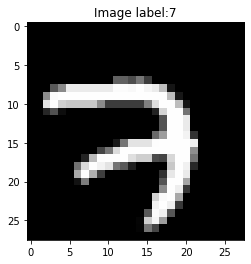

In [ ]:
plt.imshow(x_train[5000], cmap='gray', vmin=0, vmax=255)
plt.title(f"Image label:{y_train[5000]}")
plt.show() 

Now lets examine the actual values within the images, to see our range of data values. If we use a pixel in the above example, we can examine the data and should see a value 0-255, as we are expecting greyscale images.

In [ ]:
x_train[5000, 9, 10]

254

Now because we want values in between -1 and 1 for input into the neural net, we must scale the datasets, for testing and training. This is relatively simple because we only have int values in between 0 and 255, so we can divide all by 255, and we will end up with the scaled data as floating point numbers.

In [ ]:
x_train = x_train/255
y_train = y_train/255
x_test = x_test/255
y_test = y_test/255

Now we have to hink about how we build the neural network. Usually we have a Sequential network, but we have to think about how many hidden layers we have and what activation function we use.

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation='relu'), 
                          keras.layers.Dense(10, activation='softmax')])

So here we have created a Sequential network, basically we enter in a list of all the layers, each of which has its own paramters like activation function, and number of neurons. Usually when we think of the input layer, it should be at least 1 neuron per pixel/possible value. In this instance there is a pre-made Flatten() function for images which takes in the input shape and flattens it to a 1D array. So here 28 x 28, flattened equates to 784 input neurons. We also have to think about how to construct the output layer. If we have 10 possible categories to classify between, we need 10 output neurons. The other factors like number of hidden layers/neurons, and types of activation functions can be changed according to necessity, or can be tuned like hyper-paramters.
  

Next we .compile() the model, passing instructions on optimisation, loss/error function types, and the resultant metrics.

In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

This .compile() step informs the system how we want the network to be optimised. The effectiveness of a neural network is judged on the ouput of the loss function. There are different loss functions for different analyses. The most common one is RMSE for regression analyses. RMSE measures the sum of distance of the data points from the line of best fits, and so this is a good loss function for linear regression. The optimizer is the mathematical method used to evaluate to direction of change of the loss function. Gradient descent is the original otimisation technique, to search for a global minimum in loss function value. So the way we specify these parameters in our model.compile() is important and based on the specific type of model we are looking to create. Currently 'adam' is the standard optimiser.

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0264 - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8373e-06 - accuracy: 0.0975
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1187e-07 - accuracy: 0.0986
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3343e-07 - accuracy: 0.0986
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 6.3507e-08 - accuracy: 0.0994
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5487e-08 - accuracy: 0.0989
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 8.1598e-09 - accuracy: 0.0977
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.1388e-09 - accuracy: 0.0995
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5291e-09 - accuracy: 0.0983
Epoch 10/10
1875/1875 [===========================

So now we train the model, we can specify number of epochs, which means the amount of times we run the training data. Next we .evaluate() the model with the testing data. The evaluate function returns loss and accuracy data for the model on the testing data.

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Model Loss:{loss}. Model accuracy: {acc}%")

313/313 [==============================] - 1s 1ms/step - loss: 1.2159e-09 - accuracy: 0.0980
Model Loss:1.2159325768479334e-09. Model accuracy: 0.09799999743700027%


Currently this model is not doing very well. So we can tweak the hyper-paramters and see manually if that changes anything. We will change the model, layers, optimiser and number of epochs.

In [ ]:
model2 = model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation='sigmoid'),
                          keras.layers.Dense(128, activation='sigmoid'), 
                          keras.layers.Dense(10, activation='softmax')])

In [ ]:
model2.compile(optimizer='SGD', loss="mean_absolute_error", 
              metrics=['accuracy'])

Here we have added an extra hidden layer, and changed the activation functions to sigmoid. We also changed the optimiser to SGD (gradient descent) and specified a multi categorical loss function.

In [ ]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.0998
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.0997
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.0965
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.0988
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.0994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.1015
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.0986
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.1007
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.114

Still not great. Convolutional Neural networks have been shown to be more effective with image data. Lets look at another model.

Epoch 1/10


ValueError: ignored